# **IEOR 4404  Simulation (Fall 2020)**

**Homework 1  Solution [Total points: 80 Points]**


**Due 11:59 PM EST, Oct 4**

Homework 1 consists of application-oriented exercises focusing on Python and Statistics basics

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)



In [ ]:
#Your Name:
#Your UNI:

In [ ]:
#This imports all the packages you need for the homework
#Please run this first
import numpy as np

import scipy.special as spsp

import matplotlib.pyplot as plt

%matplotlib inline

import sympy


#Exercise 1 [Total: 60 points]


## Setting

**Negative Binomial Distribution** is a discrete probability distribution that models the number of successes (Our outcome variable: $k$) in a sequence of independent and identically distributed Bernoulli trials (with the probability of success=$p$) before a specified (non-random) number of failures (denoted $r$) occurs (Source: Wikipedia [Negative Binomial Distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution)).

The probability mass function follows

$P(k)=\frac{(k+r-1)!}{k!(r-1)!}p^k(1-p)^r$ where $k=0, 1, 2, ..., \infty$


**An application of Negative Binomial Distribution:**

Pokemon Go is a mobile app game in which users encounter different pokemon one by one and catch them. Shiny pokemon is a special version of pokemon, which has a different color from the normal version. 

<img src="https://d2skuhm0vrry40.cloudfront.net/2017/articles/1/8/9/1/5/2/5/pokemon-go-shinies-how-to-catch-shiny-magikarp-red-gyarados-and-how-shinies-work-1490264028872.jpg/EG11/thumbnail/750x422/format/jpg/quality/60" alt="Italian Trulli" width=400>


Assume that the probability of encountering a shiny pokemon is 0.1 and each encounter is independent of another. We are interested in studying the distribution of the total number of non-shiny pokemon a person needs to encounter before seeing 3 shiny Pokemon.



## Q1. [10 points]


* Using `NumPy` operations to construct an array that contains the probabilities of encountering different numbers of non-shiny pokemon (from 0,1,2,3,..., 120) before encountering 3 shiny pokemon. 
* Based on the array, report the probability of encountering at most 20 non-shiny pokemon before seeing 3 shiny pokemon.
* Based on the array, report the probability of encountering at least 40 non-shiny pokemon before seeing 3 shiny pokemon.
* Report the probability for encountering 20, 21, 22, 23, 24, or 25 non-shiny pokemon before getting 3 shiny pokemon.  

**[no loop allowed]**
**[You are not allowed to use scipy.stats.nbinom to get the PMF or CDF]**


In [ ]:
Outcomes=np.arange(121)
r=3
p=0.9
PMF1=spsp.factorial(Outcomes+r-1)/spsp.factorial(Outcomes)/spsp.factorial(r-1)
PMF2=np.power(p,Outcomes)*np.power(1-p,r)

NBD_PMF=PMF1*PMF2
NBD_PMF[20]
CDF = np.cumsum(NBD_PMF)
print(CDF[20])
print(1 - CDF[39])
np.sum(CDF[25]-CDF[19])

0.40804326879851793
0.19510765482693648


##Q2. [4 points]

Visualize the probability mass function in this setting using $k=0,1,2,3,\dots,120$.

**[no loop allowed]**
**[You are not allowed to use scipy.stats.nbinom to get the PMF or CDF]**



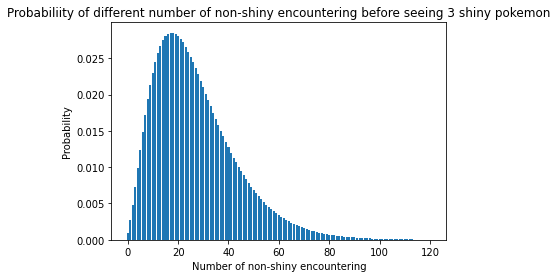

In [ ]:
plt.bar(Outcomes,NBD_PMF)
plt.xlabel("Number of non-shiny encountering")
plt.ylabel("Probability")

plt.title("Probabiliity of different number of non-shiny encountering before seeing 3 shiny pokemon")
plt.show()

##Q3. [4 points]

The expected value of the variance of this distribution have a closed-form solution. Find the formula for these two values using the Wikipedia link provided in the setting and compute the values in the context of this question in the cell below.

**[no loop allowed]** **[You are not allowed to use scipy.stats.nbinom to get the PMF or CDF]**



In [ ]:
mean_theory=r*p/(1-p)
print(mean_theory)


var_theory=p*r/(1-p)**2
print(var_theory)

27.000000000000007
270.00000000000017


##Q4. [4 points]

Use the arrays we generated in Q1 to approximate the expected value and the variance based on the formula we discussed in class.

**[no loop allowed]** **[You are not allowed to use scipy.stats.nbinom to get the PMF or CDF]**



In [ ]:
mean=np.sum(Outcomes*NBD_PMF)
print(mean)

var=np.sum(np.power(Outcomes,2)*NBD_PMF)-mean**2

print(var)


26.966794696555656
267.3971375505279


##Q5. [6 points]

Use `sympy` to derive the close-form solution of the expected value and the variance as a function of $r$ and $p$.

Your solution for $p<1$ should give the equivalent result as what you found on Wikipedia.

**[no loop allowed]** **[You are not allowed to use scipy.stats.nbinom to get the PMF or CDF]**



In [ ]:
sympy.init_printing()
x=sympy.Symbol("x")
r=sympy.Symbol("r",positive=True)
p=sympy.Symbol("p",positive=True)
PMF1=sympy.factorial(x+r-1)/sympy.factorial(x)/sympy.factorial(r-1)
PMF2=p**x*(1-p)**r

NBD_PMF=PMF1*PMF2
sympy.Sum(x*NBD_PMF,(x,0,sympy.oo)).doit().simplify()
 

⎧              -p⋅r                          
⎪              ─────                for p < 1
⎪              p - 1                         
⎪                                            
⎪            ∞                               
⎪           ____                             
⎪           ╲                                
⎪            ╲    x                          
⎨        r    ╲  p ⋅x⋅(r + x - 1)!           
⎪(-p + 1) ⋅   ╱  ─────────────────           
⎪            ╱           x!                  
⎪           ╱                                
⎪           ‾‾‾‾                             
⎪          x = 0                             
⎪─────────────────────────────────  otherwise
⎪             (r - 1)!                       
⎩                                            

In [ ]:
Ex=sympy.Sum(x*NBD_PMF,(x,0,sympy.oo)).doit() 
Varx=sympy.Sum(x**2*NBD_PMF,(x,0,sympy.oo)).doit() -Ex**2
Varx.simplify() 


⎧                                  p⋅r                                        
⎪                              ────────────                                 fo
⎪                               2                                             
⎪                              p  - 2⋅p + 1                                   
⎪                                                                             
⎪            ⎛                                   2                       ⎞    
⎪            ⎜              ⎛  ∞                ⎞                        ⎟    
⎪            ⎜              ⎜ ____              ⎟                        ⎟    
⎪            ⎜              ⎜ ╲                 ⎟                        ⎟    
⎪            ⎜              ⎜  ╲    x           ⎟                        ⎟    
⎪            ⎜            r ⎜   ╲  p ⋅x⋅(r + x)!⎟                        ⎟    
⎨            ⎜  r⋅(-p + 1) ⋅⎜   ╱  ─────────────⎟      ∞                 ⎟    
⎪            ⎜              ⎜  ╱     (r + x)⋅x! ⎟   

##Q6. [10 points]

* Use inverse transform method to generate 1000 samples. Start the search from $x=0$.
* Plot both the theretical distribution and the sample distribution using the same plot

**[Since $x$ can reach $\infty$, remember to use a while loop.]**

**[You are not allowed to use scipy.stats.nbinom to get the PMF or CDF]**


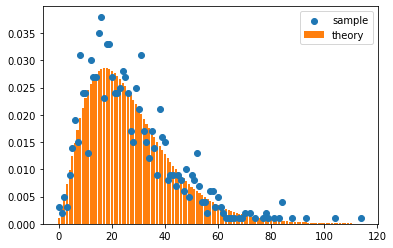

In [ ]:
def pmf_nb(x,r,p):
    PMF1=spsp.factorial(x+r-1)/spsp.factorial(x)/spsp.factorial(r-1)
    PMF2=np.power(p,x)*np.power(1-p,r)

    NBD_PMF=PMF1*PMF2
    return  NBD_PMF

def sampling():
  r=3
  p=0.9
  x=0
  pmf_0=pmf_nb(x,r,p)
  cdf=pmf_0
  u=np.random.rand()
  while u>=cdf:
    x+=1
    cdf+=pmf_nb(x,r,p)
  return x


samples=[sampling() for i in range(1000)]
 
values,counts=np.unique(np.array(samples),return_counts=True)
plt.scatter(values,counts/np.sum(counts),label="sample",zorder=2)
x=np.arange(np.max(values)+1)
r=3
p=0.9
PMF1=spsp.factorial(x+r-1)/spsp.factorial(x)/spsp.factorial(r-1)
PMF2=np.power(p,x)*np.power(1-p,r)

NBD_PMF=PMF1*PMF2
plt.bar(x,NBD_PMF,label="theory")
plt.legend(loc="best")
plt.show()

## Q7. [10 points]
* Use inverse transform method to generate 1000 samples. Perform an upward/downward search from $\lfloor E(k) \rfloor$.
* Plot both the theretical distribution and the sample distribution using the same plot.
* Use %%timeit to measure the amount of time to run the list comprehension when generating 100 samples. [Bonus points will be offered based on run time. ] 

**[You are not allowed to use scipy.stats.nbinom to get the CDF]**

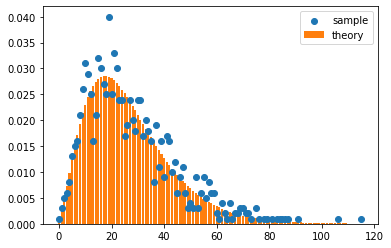

In [ ]:
#this is the most inefficient implementation
def pmf_nb(x,r,p):
    PMF1=spsp.factorial(x+r-1)/spsp.factorial(x)/spsp.factorial(r-1)
    PMF2=np.power(p,x)*np.power(1-p,r)
    NBD_PMF=PMF1*PMF2
    return  NBD_PMF
def cdf_nb(x,r,p):
  return np.sum([pmf_nb(x,r,p) for x in range(x+1)])


def sampling_ud():
  r=3
  p=0.9
  x=int(mean_theory)
  u=np.random.rand()
  if u>=cdf_nb(x,r,p):
    x=x+1
    while u>=cdf_nb(x,r,p):
      x=x+1
    return x
  else:
    x=x-1  
    while u<cdf_nb(x,r,p):
      x=x-1
    return x+1


samples=[sampling_ud() for i in range(1000)]


values,counts=np.unique(np.array(samples),return_counts=True)
plt.scatter(values,counts/np.sum(counts),label="sample",zorder=2)
x=np.arange(np.max(values)+1)
r=3
p=0.9
PMF1=spsp.factorial(x+r-1)/spsp.factorial(x)/spsp.factorial(r-1)
PMF2=np.power(p,x)*np.power(1-p,r)

NBD_PMF=PMF1*PMF2
plt.bar(x,NBD_PMF,label="theory")
plt.legend(loc="best")
plt.show()

In [ ]:
#this is more efficient. we used spsp.comb(x+r-1,x) to replace spsp.factorial(x+r-1)/spsp.factorial(x)/spsp.factorial(r-1)
def pmf_nb1(x,r,p):
    PMF1=spsp.comb(x+r-1,x) 
    PMF2=np.power(p,x)*np.power(1-p,r)
    NBD_PMF=PMF1*PMF2
    return  NBD_PMF
def cdf_nb1(x,r,p):
  return np.sum([pmf_nb1(x,r,p) for x in range(x+1)])
 

def sampling_ud4():
  r=3
  p=0.9
  x=int(mean_theory)
  u=np.random.rand()
  if u>=cdf_nb1(x,r,p):
    x=x+1
    while u>=cdf_nb1(x,r,p):
      x=x+1
    return x
  else:
    x=x-1  
    while u<cdf_nb1(x,r,p):
      x=x-1
    return x+1




In [ ]:
#much better one. instead of computing cdf from scratch every time. We iteratively update the values using PMF
def sampling_ud1():
  r=3
  p=0.9
  x=int(mean_theory)
  u=np.random.rand()

  cdf=cdf_nb(x,r,p)
  if u>=cdf:
    x=x+1
    cdf=cdf+pmf_nb(x,r,p)
    while u>=cdf:
      x=x+1
      cdf=cdf+pmf_nb(x,r,p)
    return x
  else:
    cdf=cdf-pmf_nb(x,r,p) 
    while u<cdf:
      x=x-1
      cdf=cdf-pmf_nb(x,r,p)
    return x


In [ ]:
#even better one, the PMF values are iteratively updated as well

def sampling_ud2(  ):
  r=3
  p=0.9
  x=int(mean_theory)
  u=np.random.rand()
  pmf=(1-p)**r
  cdf=pmf
  for i in range(1,x+1):
    pmf=(i+r-1)/i*p*pmf
    cdf=cdf+pmf
  u=np.random.rand()
  if u>=cdf:
    x=x+1
    pmf=(x+r-1)/x*p*pmf
    cdf=cdf+pmf
    while u>=cdf:
      x=x+1
      pmf=(x+r-1)/x*p*pmf
      cdf=cdf+pmf
  else:
    cdf=cdf-pmf 
    while u<cdf:
      pmf=pmf*x/(x+r-1)/p
      cdf=cdf-pmf
      x=x-1
  return x


In [ ]:
#pull out the calculation of starting values as these values are the same for every sample
def starting():
  r=3
  p=0.9
  x=int(mean_theory)
  u=np.random.rand()
  pmf=(1-p)**r
  cdf=pmf
  for i in range(1,x+1):
    pmf=(i+r-1)/i*p*pmf
    cdf=cdf+pmf
  return x,pmf,cdf
x_starting,pmf_starting,cdf_starting=starting()

def sampling_ud3( x_starting,pmf_starting,cdf_starting ):
  r=3
  p=0.9
  x=x_starting
  pmf=pmf_starting
  cdf=cdf_starting
  u=np.random.rand()
  if u>=cdf:
    x=x+1
    pmf=(x+r-1)/x*p*pmf
    cdf=cdf+pmf
    while u>=cdf:
      x=x+1
      pmf=(x+r-1)/x*p*pmf
      cdf=cdf+pmf
  else:
    cdf=cdf-pmf 
    while u<cdf:
      pmf=pmf*x/(x+r-1)/p
      cdf=cdf-pmf
      x=x-1
  return x
sampling_ud3(x_starting,pmf_starting,cdf_starting)

In [ ]:
%%timeit 
samples=[sampling_ud() for i in range(100)]

1 loop, best of 3: 722 ms per loop


In [ ]:
%%timeit
#[1] iteratively update CDF below 100ms
samples=[sampling_ud1() for i in range(100)]

10 loops, best of 3: 69.2 ms per loop


In [ ]:
%%timeit 
#[2] iteratively update both CDF and PMF below 1ms
samples=[sampling_ud2() for i in range(100)]

1000 loops, best of 3: 647 µs per loop


In [ ]:
%%timeit  
samples=[sampling_ud4() for i in range(100)]

1 loop, best of 3: 435 ms per loop


In [ ]:
%%timeit  
#[3] below 500 us
x_starting,pmf_starting,cdf_starting=starting()
samples=[sampling_ud3(x_starting,pmf_starting,cdf_starting) for i in range(100)]

1000 loops, best of 3: 252 µs per loop


##Q8 [12 points]

* Use `sympy` to derive the expected  number of searches as a function of $r$, $p$ and the starting value of search $i$ for an upward/downward search algorithm. 
* Compare the expected number of searches in Q6 with the expected number in Q7.
* Find a better starting point than $\lfloor E(k) \rfloor$ based on the expected number of searches. 


In [ ]:
#downward part
x=sympy.Symbol("x",nonegative=True)
r=sympy.Symbol("r",positive=True)
p=sympy.Symbol("p",positive=True)
PMF1=sympy.factorial(x+r-1)/sympy.factorial(x)/sympy.factorial(r-1)
PMF2=p**x*(1-p)**r

NBD_PMF=PMF1*PMF2
s=sympy.floor(-p*r/(p - 1))+2-x
Part1=sympy.Sum(s*NBD_PMF,(x,0,sympy.floor(-p*r/(p - 1)))).doit()
#upward part
s=x-sympy.floor(-p*r/(p - 1))+1
Part2=sympy.Sum(s*NBD_PMF,(x,sympy.floor(-p*r/(p - 1))+1,sympy.oo)).doit()
result2=sympy.simplify(Part1+Part2)
sympy.N(result2.subs({r:3,p:0.9}))
 


In [ ]:
#downward part

i=sympy.Symbol("i",positive=True)
s=i+2-x
Part1=sympy.Sum(s*NBD_PMF,(x,0,i)).doit()
#upward part
s=x-i+1
Part2=sympy.Sum(s*NBD_PMF,(x,i+1,sympy.oo)).doit()

result2=sympy.simplify(Part1+Part2)

def search_efficiency(starts):

  return sympy.N(result2.subs({r:3,p:0.9,i:starts })), starts


[search_efficiency(i) for i in range(2,40)]


 

In [ ]:
 #best value: starting from 23, expected number of searches: 14.017101769836 

#Exercise 2 [Total: 20 points]




##Setting

Benford's law, also called the first-digit law, is an observation of the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading significant digit is likely to be small. For example, in sets that obey the law, the number 1 appears as the most significant digit about 30% of the time, while 9 appears as the most significant digit less than 5% of the time. Benford's law also makes predictions about the distribution of second digits, third digits, digit combinations, and so on.

It has been shown that this result applies to a wide variety of data sets, including electricity bills, stock prices, house prices, income tax, corporate disbursements, sales figures,  demographics data, and scientific data.

A number is said to satisfy Benford's law if the leading digit d (d ∈ {1, ..., 9}) occurs with probability :

$P(d)=\log _{10}(d+1)-\log _{10}(d)=\log _{10}\left({\frac {d+1}{d}}\right)=\log _{10}\left(1+{\frac {1}{d}}\right)$











##Q1. [10 Points]

We discussed a shortcut that can help us implement the inverse transform method without doing the search. The examples we have seen so far include geometric distribution and uniform discrete distribution.  Please derive the formula (You do not need to show the derivation in your submission). [Hint: you will need to derive the CDF first]
* Use `sympy` to derive the CDF of this distribution. Clearly show your steps.
* Based on the CDF, derive a formula that can directly convert a `u` to a `x` sample based on floor operation. [No need to show the derivation]. Based on your derivation result, simulate 10000 samples. 
* Plot the distribution of the samples using a bar chart. Also, show the scatter plot of the theoretical pmf on the same chart. </font > 


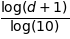

In [ ]:
d=sympy.Symbol("d",real=True)
PMF=sympy.log(d+1)/sympy.log(10)-sympy.log(d)/sympy.log(10)
CDF=sympy.Sum(PMF,(d,1,d)).doit()
CDF

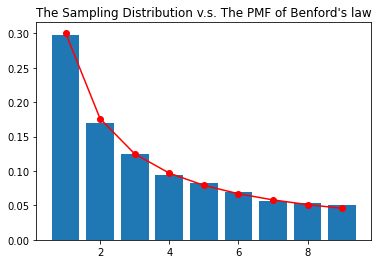

In [ ]:
x = np.arange(1,10)
pmf = np.log(1+1/x)/np.log(10)


N=10000

u=np.random.rand(N)
Samples=np.floor(np.power(10,u))




#plot
height=np.empty(9)
for i in range(1,10):
  height[i-1]=np.sum(Samples==i)/N
plt.bar(x, height)
plt.plot(x, pmf, "r", marker='o')
plt.title("The Sampling Distribution v.s. The PMF of Benford's law")

plt.show()



##Q2. [10 points]

This distribution has been widely applied. For example, it has been used to detect possible fraud. For naturally occuring numbers, the first digit should follow Benford's law.  [For example, the first digit of 13.23 is 1]. However, fabricated data is likely not to follow the data.

The following data comes from the case State of Arizona v. Wayne James Nelson (CV92-18841). Nelson, a manager in Office of Arizona State Treasurer, is charged to have diverted nearly $2m funds to a fictitious vendor. Use simulation to study whether the amount might be fabricated by doing the following. 

* 1. Draw samples from this hypothetical distribuion [make sure that the sample size being comparable to the size of the observed samples] 
* 2. visualze the distribution of the samples using a line plot with marker "o". 
* 3. To ensure the robustness, repeat step 1 and step 2 10 times. Thus, in the same graph, you will have 10 line plots. 
* 4. In the same graph, plot the distribution of the actual data we observe using a bar chart.
* 5. Based on the graph, briefly argue whether the amount might be fabricated.


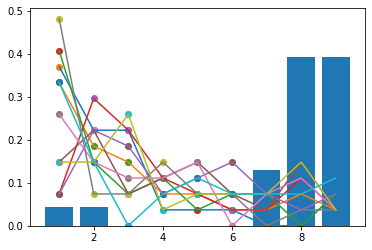

In [ ]:
amount=np.array([1927.46, 27902.31, 86241.90, 72117.46, 81321.75, 97473.96, 93249.11, 89658.17, 87776.89, 92105.83, 79949.16, 87602.93, 96879.27, 91806.47, 84991.67, 90831.83, 93776.67, 88336.72, 94639.69, 83709.28, 96412.21, 88432.86, 71552.15])
#get first digits
digits=np.empty(len(amount))
i=0
for num in amount:
  digits[i]=int(str(num)[0])
  i=i+1
  
#or more efficiently
digits = [int(str(num)[0]) for num in amount]

N=27

#repeatedly draw 23 samples from the hypothetical distribution and plot them 
def samples_23():
  
  u=np.random.rand(N)
  Samples=np.floor(np.power(10,u))
  height=np.empty(9)
  for i in range(1,10):
    height[i-1]=np.sum(Samples==i)/N
  plt.scatter(x,height)
  plt.plot(x,height)

  
#get the height for the bar chart  
Height0=np.empty(9)
for i in x:
  Height0[i-1]=np.sum(digits==i)/np.size(digits)
#or more efficiently
Height0=np.array([np.sum(digits==d)/np.size(digits) for d in x])


plt.bar(x,Height0)
for i in range(10):
  samples_23()
#we can clearly see that the sample distributions using samples from our hypothetical Benford distribution 
#look very different from the sample distribution using the observed distribution. This is suggesting that 
#it is very likely that the observed samples are are not generated from the hypothetical distribution
#In other words, the numbers might be fabricated.  